# Fraud Detection

#### About Data

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Import Required Libraries & Load Data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("Fraud.csv")

In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#statistics 

df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


- we can see mean is greater than median and data is highly fluctuated

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

there is no null values in our dataframe

### Checking for duplicate values

In [8]:
print('Number of duplicated values in dataset: ',df.duplicated().sum())


Number of duplicated values in dataset:  0


## Checking for imbalance in our target variable "isFraud"

In [9]:
df['isFraud'].value_counts() # only 8k transactions are fraudlent

0    6354407
1       8213
Name: isFraud, dtype: int64

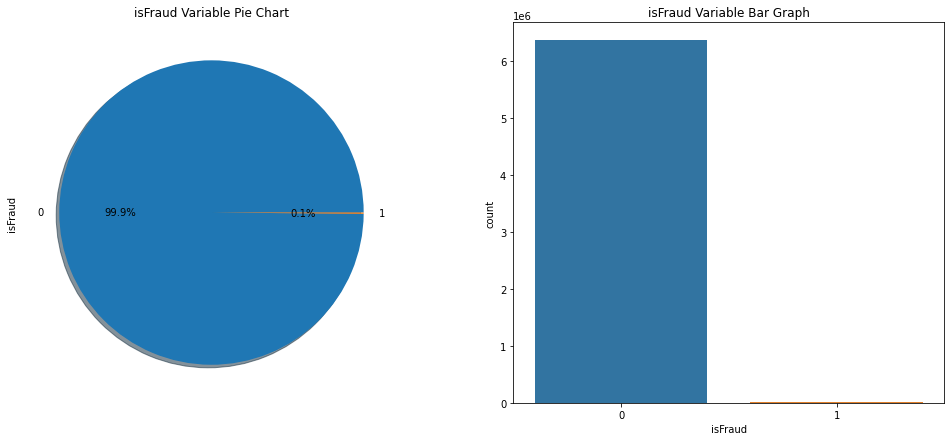

In [10]:
f, axes = plt.subplots(1, 2, figsize=(17, 7))
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot(x='isFraud', data=df, ax=axes[1], order=[0, 1])
axes[0].set_title('isFraud Variable Pie Chart')
axes[1].set_title('isFraud Variable Bar Graph')

plt.show()

- Our Target variable is highly imbalanced with 99.9% legitimate transaction and only 0.1% Fraud transaction. 
- In such cases, the accuracy metric can be misleading because even a naive classifier that always predicts the majority class
will have high accuracy. 
- Therefore, it is important to use other evaluation metrics like precision, recall, F1-score, and AUC-ROC that take into 
account both the true positive and false positive rates of the model's predictions.

In [5]:
## Get the Fraud and the normal dataset 

fraud = df[df['isFraud']==1]

normal = df[df['isFraud']==0]

In [6]:
print(fraud.shape,normal.shape)

(8213, 11) (6354407, 11)


In [7]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [9]:
normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

As we can see for fraud transactions the maximum amount is less than normal transaction

In [11]:
df_copy = df.copy()

## Box Plot Outlier Detection

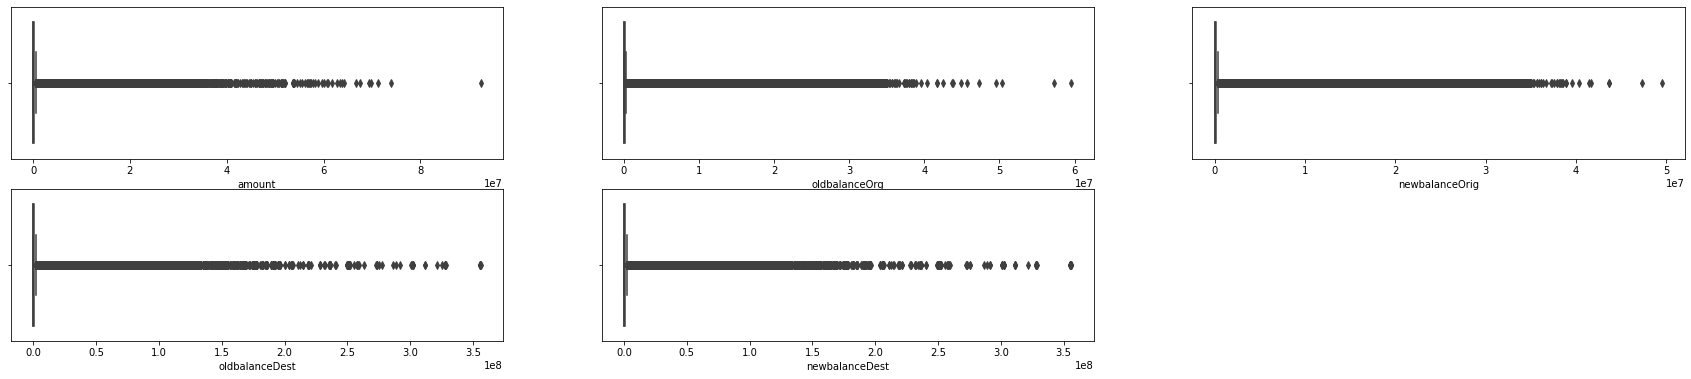

In [12]:
# plot boxplot to view outliers
# outliers
plt.figure(figsize=(30,100))
plotnumber=1
for i in ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
    ax=plt.subplot(30,3,plotnumber) 
    sns.boxplot(x=df[i])
    plt.xlabel(i )
    plotnumber+=1 
plt.show()

- It looks like we have a significant problems with outliers.
- We have no conclusive evidence that the outliers are the result of data entry errors, and since there are only a few fraudulent transactions, we have decided to leave the data as it is.

# Comparing the amount value of normal transactions versus fraud

Non Fraud %  99.87
Fraud %     0.13


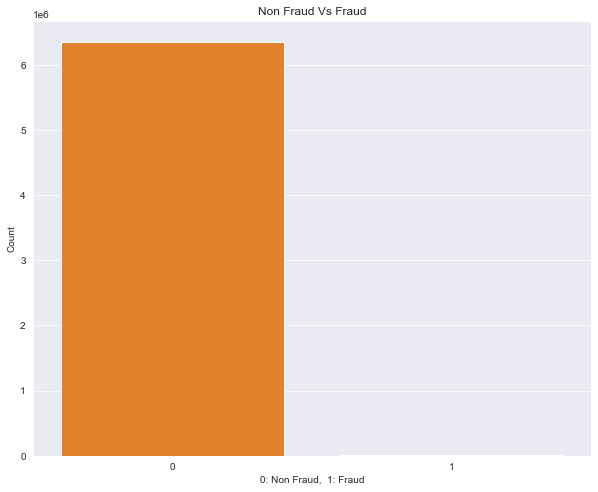

In [13]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['isFraud'].value_counts().index,y=df['isFraud'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud Vs Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['isFraud'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['isFraud'].value_counts()[1]/len(df)*100,2));

### Pie chart

In [14]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:title={'center':'Type of Transactions '}, ylabel='type'>

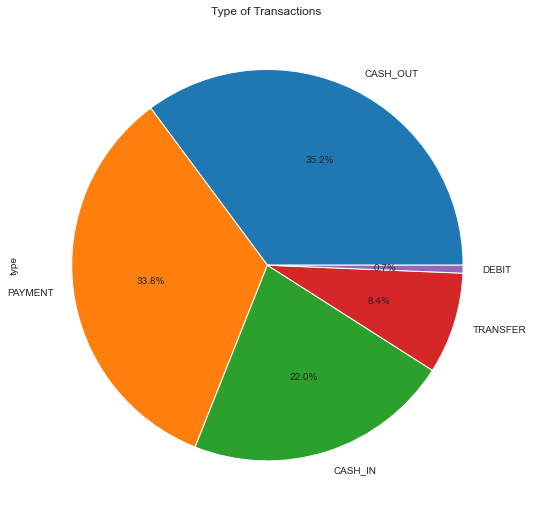

In [15]:
df['type'].value_counts(normalize=True).plot.pie(y = 'type', title ='Type of Transactions ', figsize=(12,9), autopct='%1.1f%%')

 - It appears that the "CASH-OUT" and "PAYMENT" transaction types are the most frequently occurring

In [16]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

- As we can see only 16 transactions were flagged Fraud

[None, None, None, None, None, None, None, None, None, None]

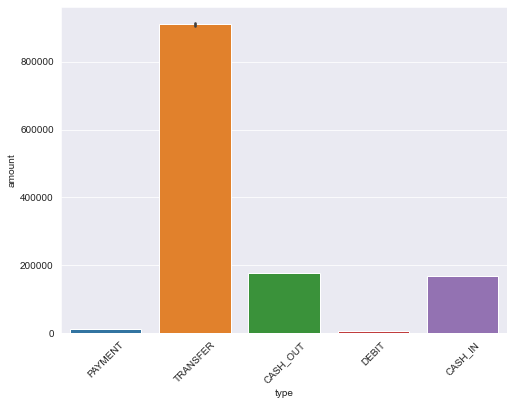

In [17]:
plt.figure(figsize = (8,6))
sns.barplot(x='type',y='amount',data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

- Here we can see most of our transactions are through Transfer and cashout.
- Debit is the least used mode of transaction.

[None, None, None, None]

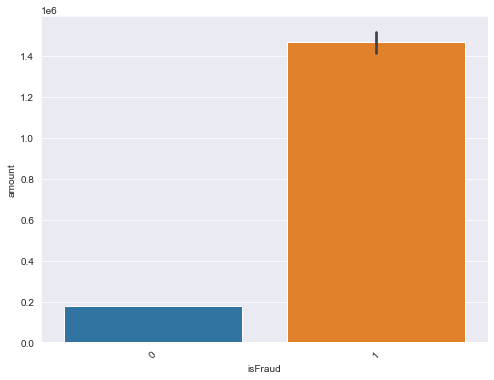

In [18]:
plt.figure(figsize = (8,6))
sns.barplot(x='isFraud',y='amount',data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

 - Here we can see the fraud transactions are for larger amount

<AxesSubplot:xlabel='type', ylabel='count'>

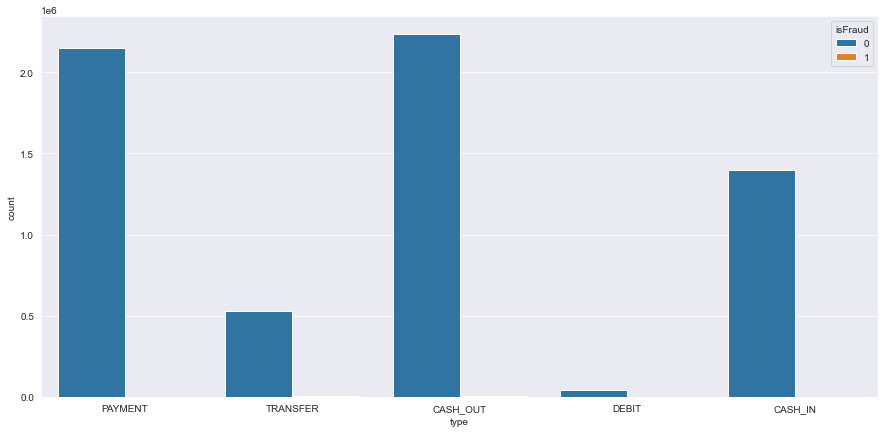

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(df['type'],hue=df['isFraud'])

In [20]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

- Only 16 Transactions are flagged as fraud

# This is the List of 16 Customer who are flagged as fraud

In [21]:
flagged_customers = df[df['isFlaggedFraud']==1]['nameOrig'].unique()
fraudulent_customers = df[df['nameOrig'].isin(flagged_customers)]
fraudulent_customers

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [22]:
print(df.groupby(['type', 'isFraud'])['isFraud'].count())


type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64


 - There were 1,399,284 cash-in transactions that were not fraudulent (isFraud=0)
 - There were 2,233,384 cash-out transactions that were not fraudulent (isFraud=0)
 - There were 4,116 cash-out transactions that were fraudulent (isFraud=1)
 - There were 41,432 debit transactions that were not fraudulent (isFraud=0)
 - There were 2,151,495 payment transactions that were not fraudulent (isFraud=0)
 - There were 528,812 transfer transactions that were not fraudulent (isFraud=0)
 - There were 4,097 transfer transactions that were fraudulent (isFraud=1)

Overall, cash-out and transfer transactions have a higher likelihood of being fraudulent, with a small proportion of those transactions being flagged as fraudulent.

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Analyzing Merchant Analysis

In [24]:
# Analyze merchant behavior by examining the transaction amounts, types, and frequencies
merchant_transactions = df[df['nameDest'].str.startswith('M')].groupby('nameDest').agg({'amount': ['sum', 'count']})

# Identify high-performing merchants and those that may be at risk of fraud
merchant_transactions.describe()


amount              
                sum         count
count  2.150401e+06  2.150401e+06
mean   1.306425e+04  1.000509e+00
std    1.256331e+04  2.257020e-02
min    2.000000e-02  1.000000e+00
25%    4.385390e+03  1.000000e+00
50%    9.486860e+03  1.000000e+00
75%    1.756962e+04  1.000000e+00
max    2.386380e+05  3.000000e+00

- These statistics can provide insight into the spending habits of customers when making purchases from merchants. 
- For example, the high maximum value suggests that there may be a few customers who make very large purchases from merchants.
- The low minimum value suggests that most transactions are not for very small amounts. The standard deviation indicates that 
the data is somewhat spread out around the mean, which could suggest that there is a wide variety of types of merchants or
types of products sold.

## Risk Aanalysis

In [25]:
# Analyze the transaction patterns and characteristics to identify areas of risk in the system
risk_transactions = df.groupby(['type', 'isFraud']).agg({'amount': 'sum', 'nameDest': 'count'})

# Develop strategies to mitigate risk and prevent fraud
risk_transactions.groupby('type')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,1.0,2.363674e+11,NaN,2.363674e+11,2.363674e+11,2.363674e+11,2.363674e+11,2.363674e+11
CASH_OUT,2.0,1.972065e+11,2.704221e+11,5.989202e+09,1.015978e+11,1.972065e+11,2.928151e+11,3.884238e+11
DEBIT,1.0,2.271992e+08,NaN,2.271992e+08,2.271992e+08,2.271992e+08,2.271992e+08,2.271992e+08
PAYMENT,1.0,2.809337e+10,NaN,2.809337e+10,2.809337e+10,2.809337e+10,2.809337e+10,2.809337e+10
TRANSFER,2.0,2.426460e+11,3.345729e+11,6.067213e+09,1.243566e+11,2.426460e+11,3.609354e+11,4.792248e+11


Looking at the output, we can see that there are some missing values represented as "NaN" in the mean and std columns. This is likely due to having only one or two transactions of that type in the dataset. For example, there is only one "DEBIT" transaction in the dataset, so the mean and std columns are missing.

In terms of risk analysis, we can use these summary statistics to identify any potential outliers or unusual transactions. For example, the "CASH_IN" type has a very high mean and max value compared to the other types, which could be an indication of fraudulent activity or money laundering. The "TRANSFER" type also has a very high mean and max value, but with a much wider range (as indicated by the larger standard deviation), which could also be a red flag for suspicious activity.

In [26]:
fraudulent_transactions = df[df['isFraud'] == 1]

# Calculate the total amount of fraudulent transactions
total_fraudulent_amount = fraudulent_transactions['amount'].sum()

print("Total amount of fraudulent transactions: ${:,.2f}".format(total_fraudulent_amount))


Total amount of fraudulent transactions: $12,056,415,427.84


In [27]:
# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (df['isFraud'].sum() / len(df)) * 100

print("Percentage of fraudulent transactions: {:.2f}%".format(percentage_fraudulent))


Percentage of fraudulent transactions: 0.13%


# One Hot Encoding

In [45]:
dummy_df = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, dummy_df], axis=1)
df.drop(['type'], axis=1, inplace=True)

In [29]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


# Correlation Matrix

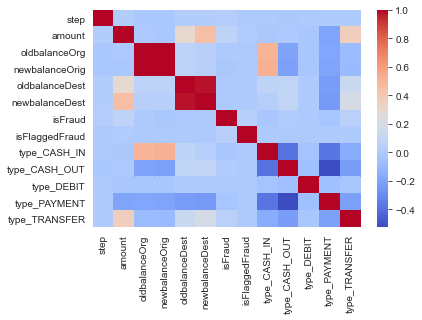

In [30]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

In [31]:
corr_matrix = df.corrwith(df['isFraud']).sort_values(ascending=False)
print(corr_matrix)


isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_CASH_IN     -0.019089
type_PAYMENT     -0.025697
dtype: float64


- In this case, the variable "amount","type_TRANSFER" has a moderate positive correlation with "isFraud", indicating that higher transaction amounts may be associated with a higher likelihood of fraud. The variable "isFlaggedFraud", "step", and "type_CASH_OUT also has a positive correlation with "isFraud", but it is relatively weak.

- The other variables have either a weak positive or negative correlation with "isFraud", indicating that they may not be strong predictors of fraud on their own. However, it's important to keep in mind that these correlations only provide a preliminary indication of potential predictors, and further analysis and modeling is needed to determine the actual predictors of fraud.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X is the feature matrix and y is the target variable
X = df.drop(['step','isFraud','nameOrig','nameDest'], axis=1)
y = df['isFraud']

# apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)

# summarize scores
scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
scores = scores.sort_values('Score', ascending=False)
print(scores.head(10))


           Feature         Score
0           amount  7.586237e+10
1    oldbalanceOrg  6.563092e+09
2   newbalanceOrig  4.223772e+09
3   oldbalanceDest  2.313389e+09
4   newbalanceDest  2.009466e+07
10   type_TRANSFER  1.691703e+04
5   isFlaggedFraud  1.237922e+04
9     type_PAYMENT  2.780783e+03
6     type_CASH_IN  1.808559e+03
7    type_CASH_OUT  5.226124e+02


In [33]:
df.dtypes

step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

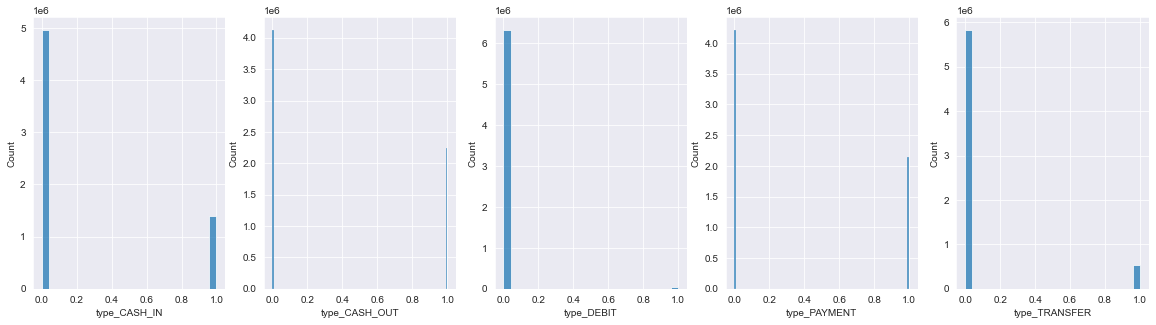

In [34]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

sns.histplot(df['type_CASH_IN'], kde=False, ax=axs[0])
sns.histplot(df['type_CASH_OUT'], kde=False, ax=axs[1])
sns.histplot(df['type_DEBIT'], kde=False, ax=axs[2])
sns.histplot(df['type_PAYMENT'], kde=False, ax=axs[3])
sns.histplot(df['type_TRANSFER'], kde=False, ax=axs[4])

plt.show()

- Here we can see that the distribution of one hot encoded "type" feature is highly skewed(i.e., one category has a much larger frequency than the others), we will consider scaling it to ensure that the model is not overly influenced by that category.

## Changing Data Type of "type" features from 'uint8' to 'float'

In [46]:
df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']] = df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].astype('float64')


In [36]:
df.dtypes

step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN      float64
type_CASH_OUT     float64
type_DEBIT        float64
type_PAYMENT      float64
type_TRANSFER     float64
dtype: object

# Train-test split and StandardScaler

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Select numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                      'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train[numerical_features])

# Scale the numerical features in the train and test sets
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [38]:
# Print the shape of the train and test sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5090096, 12)
X_test shape: (1272524, 12)
y_train shape: (5090096,)
y_test shape: (1272524,)


## Random UnderSampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler
print("Shape of X_train before undersampling:", X_train.shape)
print("Shape of y_train before undersampling:", y_train.shape)

# Create a random undersampler object
rus = RandomUnderSampler(random_state=42)

# Apply the undersampling to the training data only
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Shape of X_train after undersampling:", X_train_res.shape)
print("Shape of y_train after undersampling:", y_train_res.shape)


Shape of X_train before undersampling: (5090096, 11)
Shape of y_train before undersampling: (5090096,)
Shape of X_train after undersampling: (13140, 11)
Shape of y_train after undersampling: (13140,)


## Training & Testing Model with Imbalance Data 

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_res, y_train_res)

LogisticRegression()

# Make predictions on the train  data

In [50]:
x_pred = log_reg.predict(X_train_res)

In [51]:
# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_train_res, x_pred)
precision = precision_score(y_train_res, x_pred)
recall = recall_score(y_train_res, x_pred)
f1 = f1_score(y_train_res, x_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9248858447488585
Precision: 0.9366494603472548
Recall: 0.9114155251141552
F1-score: 0.9238602175422356


In [52]:
# Print the classification report 
print(classification_report(y_train_res, x_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6570
           1       0.94      0.91      0.92      6570

    accuracy                           0.92     13140
   macro avg       0.93      0.92      0.92     13140
weighted avg       0.93      0.92      0.92     13140



In [53]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_res, x_pred))

[[6165  405]
 [ 582 5988]]


# Make predictions on the test data

In [54]:
y_pred = log_reg.predict(X_test)

In [55]:
# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9327297559810267
Precision: 0.017304817753248245
Recall: 0.9160073037127207
F1-score: 0.03396792795639466


In [56]:
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1270881
           1       0.02      0.92      0.03      1643

    accuracy                           0.93   1272524
   macro avg       0.51      0.92      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



In [57]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1185416   85465]
 [    138    1505]]


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#create a random forest classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth = 10,min_samples_leaf=10)
# Train the model on the training data
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

## Prdiction on Train data

In [60]:
x_pred = rf.predict(X_train_res)

In [61]:
# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_train_res, x_pred)
precision = precision_score(y_train_res, x_pred)
recall = recall_score(y_train_res, x_pred)
f1 = f1_score(y_train_res, x_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.989041095890411
Precision: 0.9828674481514879
Recall: 0.9954337899543378
F1-score: 0.9891107078039927


In [62]:
# Print the classification report 
print(classification_report(y_train_res, x_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6570
           1       0.98      1.00      0.99      6570

    accuracy                           0.99     13140
   macro avg       0.99      0.99      0.99     13140
weighted avg       0.99      0.99      0.99     13140



In [63]:
# print confusion matrix
print(confusion_matrix(y_train_res, x_pred))

[[6456  114]
 [  30 6540]]


## Prediction on Test data

In [64]:
y_pred = rf.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

#metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9806149039232266
Precision: 0.062212419667642696
Recall: 0.995739500912964
F1-score: 0.11710808876163208


In [66]:
# Print the classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      1.00      0.12      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524



In [67]:
# print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1246220   24661]
 [      7    1636]]


### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 100}


In [69]:

# Get the predicted labels for the test data
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

#metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.986698089780625
Precision: 0.08825431034482759
Recall: 0.996956786366403
F1-score: 0.16215413552442706


after hyperparameter tuning we are still getting very low precision and f1 score

## Oversampling

In [75]:

print("Shape of X_train before overrsampling:", X_train.shape)
print("Shape of y_train before overrsampling:", y_train.shape)

from imblearn.over_sampling import SMOTE

# assume X_train and y_train are your training data and labels, respectively
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train, y_train)

print("Shape of X_train after overrsampling:", X_over.shape)
print("Shape of y_train after overrsampling:", y_over.shape)


Shape of X_train before overrsampling: (5090096, 11)
Shape of y_train before overrsampling: (5090096,)
Shape of X_train after overrsampling: (10167052, 11)
Shape of y_train after overrsampling: (10167052,)


In [76]:
# Train the model
log_reg.fit(X_over, y_over)

LogisticRegression()

In [78]:
y_pred = log_reg.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

#metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9505769635778971
Precision: 0.024752091124939864
Recall: 0.970785149117468
F1-score: 0.04827335734390606


after oversampling also our model is performing really bad

# Stratified cross-validation

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Assume X is your input data and y is your target variable
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train_res, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_res, y_test = y[train_index], y[test_index]

    

## logistic reg after cross validation

In [93]:
# Train the model
log_reg.fit(X_train_res, y_train_res)
y_pred = log_reg.predict(X_test)
# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9992314486799463
Precision: 0.9090909090909091
Recall: 0.45012165450121655
F1-score: 0.6021155410903173


# Random forest after cross validation

In [95]:

#create a random forest classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth = 10,min_samples_leaf=10)
# Train the model on the training data
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

In [96]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9996117951409954
Precision: 0.989778534923339
Recall: 0.7068126520681265
F1-score: 0.8246983676366216


After Doing Stratified cross validation this is the best what we got.